<a href="https://colab.research.google.com/github/arielle00/CMPE252-AI/blob/main/CMPE252_SEC01_SP2023_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Home Assigment 1, CMPE 252, Section 01, Fall 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty).

**This assignment is individual**.

The deadline is Septemper 14, 2023, 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

In [93]:
import os
import time

print(os.getcwd())

/content


import the necessary libraries

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [34]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')
    m=[]
    j = 0
    for i in a.readlines():
        # print(j)
        # print(i.split(" "))
        m.append(np.array(i.split(" "), dtype="int32"))
        j=j+1
    out = np.array(m)
    #print
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***:

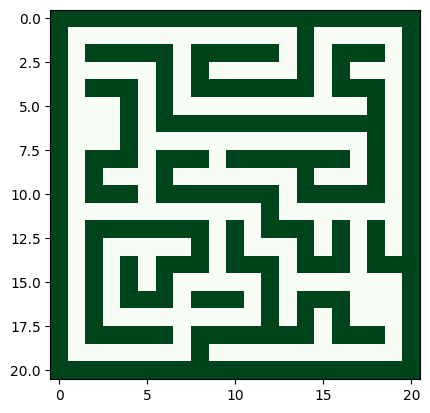

In [59]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')


In [60]:
START=(1, 1)
GOAL=(19,19)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [37]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [38]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()

    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [39]:
#example for visualization of maze with visited nodes and shortest path
#visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

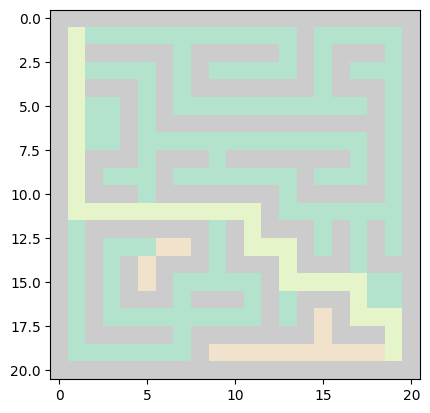

In [40]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search***

In [124]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, w, h_fn):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    visited = set()

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited.add(current)

        for next in (graph[current]):
            #graph[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost

                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter

                priority = new_cost + w*h_fn(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current=goal
    path = []
    while current != start:
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

***Dijkstra Algorithm***

In [42]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph
    shortest_path = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_path[start_node] = 0

    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START:
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START)
    path.reverse()
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences)
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze.
Use your maze in the below tasks.

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates

In [57]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - GOAL[0])**2 + (node1[1] - GOAL[1])**2)**0.5
    pass



In [44]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return (abs(node1[0]-node2[0]) + abs(node1[1]-node2[1]))
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

In [125]:
def search_maze(w, h_fn):
  start_time = time.time()
  maze2 = build_maze("my_maze_25x25.txt")
  graph = Find_the_edges(maze2)
  # print(graph)
  START=(1, 1)
  GOAL=(24,24)

  came_from, path = astar_path(graph, START, GOAL, w, h_fn)
  end_time = time.time()

  print("Distance visited nodes amount:",len(came_from))
  #print("Shortest path nodes:",path)
  print("Shortest path:",len(path))

  for i in came_from:
    maze2[i[0],i[1]]=-3
  for i in path:
    maze2[i[0],i[1]]=-1
  plt.imshow(maze2, cmap='Pastel2')
  plt.show()

  return end_time-start_time, came_from

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

Euclidean
Distance visited nodes amount: 303
Shortest path: 47


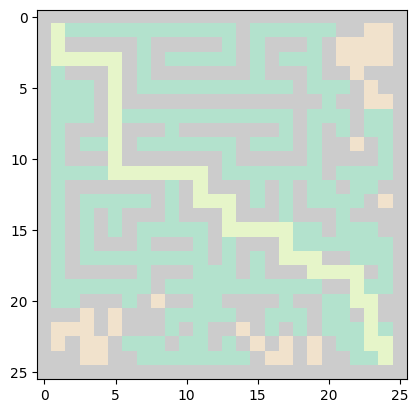

Euclidean total time: (0.013010263442993164, {(1, 1): None, (2, 1): (1, 1), (1, 2): (1, 1), (1, 3): (1, 2), (3, 1): (2, 1), (1, 4): (1, 3), (4, 1): (3, 1), (3, 2): (3, 1), (3, 3): (3, 2), (1, 5): (1, 4), (5, 1): (4, 1), (3, 4): (3, 3), (1, 6): (1, 5), (6, 1): (5, 1), (5, 2): (5, 1), (3, 5): (3, 4), (6, 2): (5, 2), (5, 3): (5, 2), (1, 7): (1, 6), (7, 1): (6, 1), (4, 5): (3, 5), (6, 3): (5, 3), (7, 2): (6, 2), (5, 5): (4, 5), (7, 3): (6, 3), (2, 7): (1, 7), (1, 8): (1, 7), (8, 1): (7, 1), (6, 5): (5, 5), (3, 7): (2, 7), (4, 7): (3, 7), (1, 9): (1, 8), (9, 1): (8, 1), (7, 5): (6, 5), (5, 7): (4, 7), (5, 8): (5, 7), (8, 5): (7, 5), (7, 6): (7, 5), (1, 10): (1, 9), (10, 1): (9, 1), (7, 7): (7, 6), (5, 9): (5, 8), (9, 5): (8, 5), (7, 8): (7, 7), (1, 11): (1, 10), (11, 1): (10, 1), (5, 10): (5, 9), (10, 5): (9, 5), (9, 4): (9, 5), (7, 9): (7, 8), (8, 9): (7, 9), (7, 10): (7, 9), (5, 11): (5, 10), (11, 5): (10, 5), (1, 12): (1, 11), (12, 1): (11, 1), (11, 2): (11, 1), (11, 3): (11, 2), (9, 9):

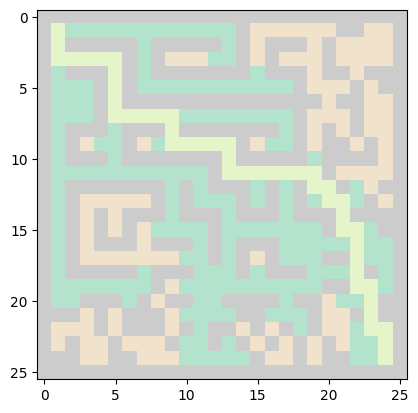

Manhattan total time: (0.008332014083862305, {(1, 1): None, (2, 1): (1, 1), (1, 2): (1, 1), (1, 3): (1, 2), (1, 4): (1, 3), (1, 5): (1, 4), (1, 6): (1, 5), (1, 7): (1, 6), (2, 7): (1, 7), (1, 8): (1, 7), (1, 9): (1, 8), (1, 10): (1, 9), (1, 11): (1, 10), (1, 12): (1, 11), (1, 13): (1, 12), (2, 13): (1, 13), (3, 1): (2, 1), (3, 7): (2, 7), (3, 13): (2, 13), (4, 1): (3, 1), (3, 2): (3, 1), (3, 3): (3, 2), (3, 4): (3, 3), (3, 5): (3, 4), (4, 5): (3, 5), (4, 7): (3, 7), (3, 12): (3, 13), (5, 1): (4, 1), (5, 5): (4, 5), (5, 7): (4, 7), (6, 1): (5, 1), (5, 2): (5, 1), (6, 2): (5, 2), (5, 3): (5, 2), (6, 3): (5, 3), (6, 5): (5, 5), (5, 8): (5, 7), (5, 9): (5, 8), (5, 10): (5, 9), (5, 11): (5, 10), (5, 12): (5, 11), (5, 13): (5, 12), (5, 14): (5, 13), (5, 15): (5, 14), (4, 15): (5, 15), (5, 16): (5, 15), (5, 17): (5, 16), (7, 1): (6, 1), (7, 2): (6, 2), (7, 3): (6, 3), (7, 5): (6, 5), (8, 1): (7, 1), (8, 5): (7, 5), (7, 6): (7, 5), (7, 7): (7, 6), (7, 8): (7, 7), (7, 9): (7, 8), (8, 9): (7, 9)

In [114]:
print("Euclidean")
total_time = search_maze(1, Euclidean_distance)
print("Euclidean total time:",total_time)
print("\n")
print("Manhattan")
total_time = search_maze(1, Manhattan_distance)
print("Manhattan total time:",total_time)

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

-----------------Euclidean-----------------
Distance visited nodes amount: 303
Shortest path: 47


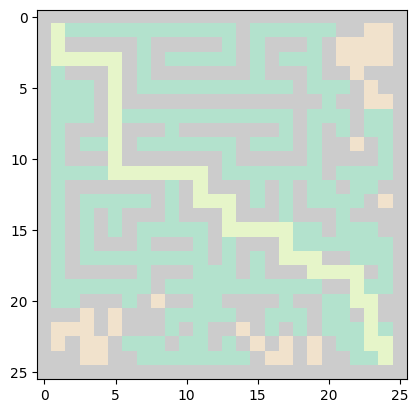

Distance visited nodes amount: 275
Shortest path: 47


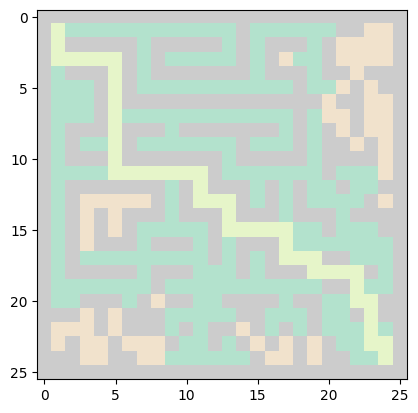

Distance visited nodes amount: 99
Shortest path: 47


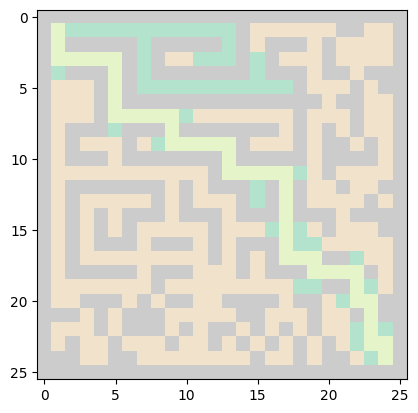

Distance visited nodes amount: 80
Shortest path: 57


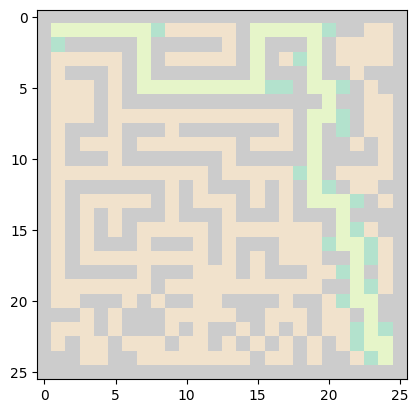

Distance visited nodes amount: 80
Shortest path: 57


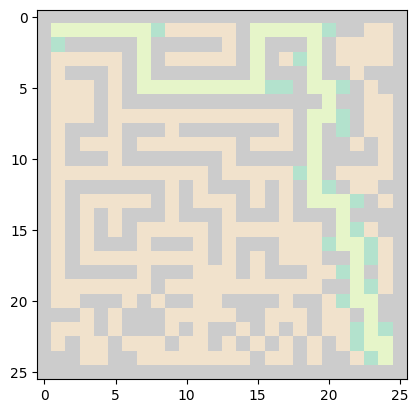

In [136]:
print("-----------------Euclidean-----------------")
weights_euclidean = [0.3,0.8,2,5,10]
times_euclidean = []
came_from = []

for weight in weights_euclidean:
    elapsed_time, search_path = search_maze(weight, Euclidean_distance)
    times_euclidean.append(elapsed_time)
    came_from.append(len(search_path))


-----------------Manhattan-----------------
Distance visited nodes amount: 252
Shortest path: 47


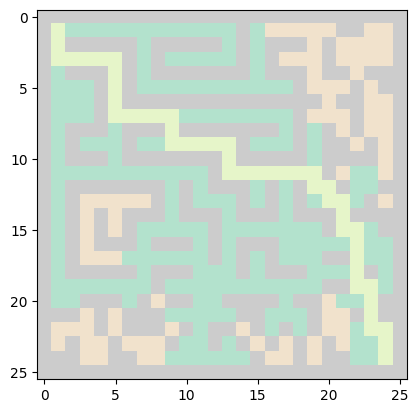

Distance visited nodes amount: 113
Shortest path: 49


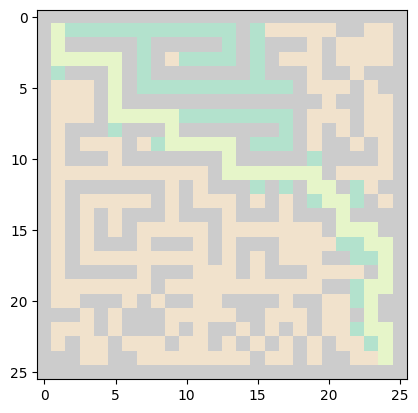

Distance visited nodes amount: 90
Shortest path: 59


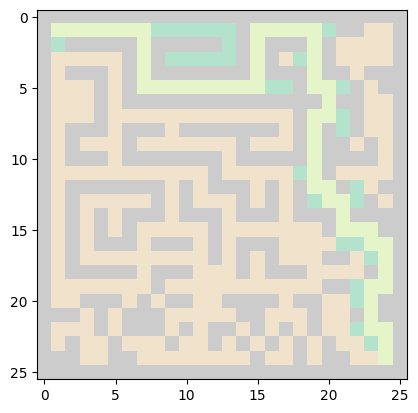

Distance visited nodes amount: 90
Shortest path: 59


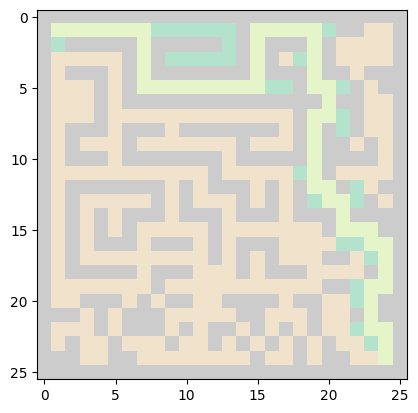

In [137]:
print("-----------------Manhattan-----------------")
weights_manhattan = [0.8,1.6,5,10]
times_manhattan = []
came_from = []


for weight in weights_manhattan:
    elapsed_time, search_path = search_maze(weight, Manhattan_distance)
    times_manhattan.append(elapsed_time)
    came_from.append(len(search_path))


Explain what changes you observe for the different weights and why it occurs.

For the Euclidean distance the shortest path increased when I used higher weights such as 5 and 10. When I tried w = 2 he shortest path was the same as weight=1 but the nodes explored increased. From observation it seems that a weight closer to 1 is the best, least nodes explored and optimal shortest path. Less and 1 also got us the optomal shortest path but explored more nodes.

For the Manhattan distance, when I tried w=0.8, I got the optimal shortest path but it explored more nodes than w=1. But, anything above 1.5 gave me the non optimal shortest path but did explore much less nodes. The best result is given when the weight is closer to 1.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

Text(0.5, 1.0, 'Time Taken vs Weights Euclidean')

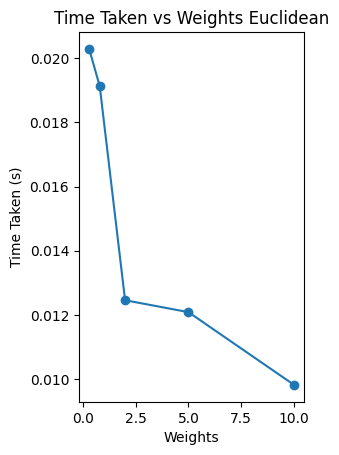

In [138]:
plt.subplot(121)
plt.plot(weights_euclidean, times_euclidean, marker='o')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Euclidean')
# plt.show()

ValueError: ignored

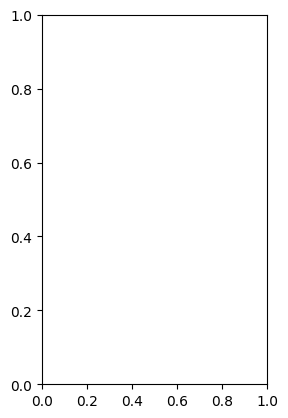

In [139]:
plt.subplot(122)
plt.plot(weights_euclidean, came_from, marker='o')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Euclidean')
plt.show()

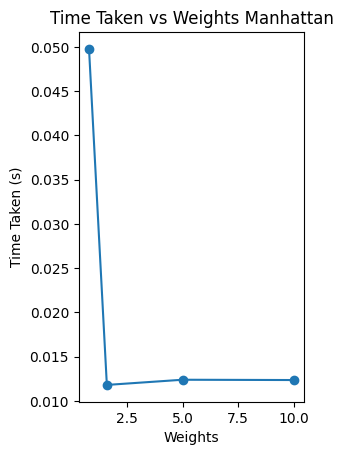

ValueError: ignored

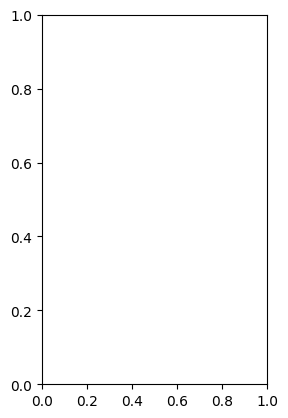

In [135]:
plt.subplot(121)
plt.plot(weights_manhattan, times_manhattan, marker='o')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Manhattan')
plt.show()

plt.subplot(122)
plt.plot(weights_manhattan, came_from, marker='o')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Manhattan')
plt.show()


### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for Dijkstra: 47


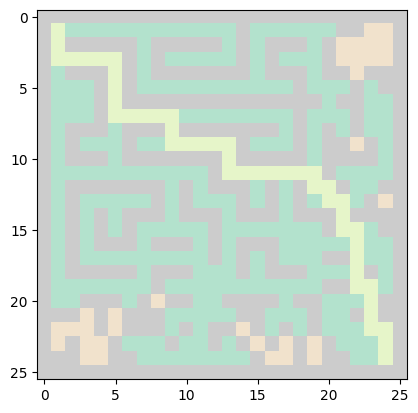

In [132]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for BFS: 47


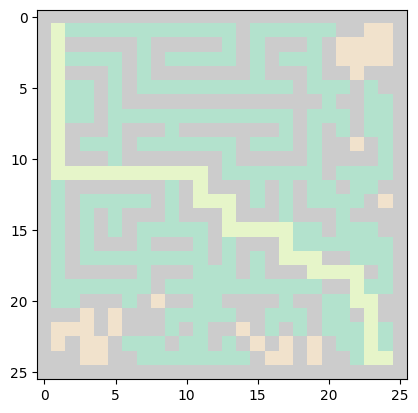

In [133]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below.
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
![cmpe252_HW1_Bonus.png](attachment:cmpe252_HW1_Bonus.png)